# Data cleaning
Data cleaning is an important process in any machine learning project, as it aids the removal of anomalies in the raw data. These anomalies, if not removed or checked appropriately, will bias the model that will be trained on said data. Data cleaning in **image processing**, for the most part, involves getting rid of unnecessary parts of the images. Like cropping out the portion of the image that we are interested in and getting rid of the unnecessary portions.<br>
For instance, if I am building a model that predicts a person with their face, I will need only the face of said person, so it only makes sense to crop out the face and discard the rest of the image.<br>
**To the code!**

In [1]:
# Import a few packages for data cleaning.
%matplotlib inline
import cv2
import matplotlib 
import matplotlib.pyplot as plt

I've set aside a few images to test this process, before implementing it on the entire dataset.

In [2]:
image = cv2.imread(r"C:\Users\ifunanyaScript\Everything\FootballStars_image_cnn\data\misc_data\mo1.jpg")
image.shape

(810, 540, 3)

This image has 3 dimesions because it is a coloured image. The third dimension **"3"** represents the RGB colour space. Every colour is a combination of RGB values. So each pixel in the image has a colour which is a combination of **3** colour values(RGB). The value of each colour channel spans 0-255; (0 is 0% and 255 is 100%):<br>
##### How it works?
(R: 0, G: 0, B: 0), entirely black<br>
(R: 255, G: 255, B: 255), entirely white<br>
(R: 255, G: 0, B: 0), entirely red<br>
(R: 0, G: 255, B: 0), entirely green<br>
(R: 0, G: 0, B: 255), entirely blue<br>
Changing the values of any of the 3 channels gives a different colour.

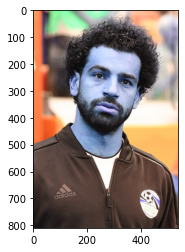

In [3]:
plt.imshow(image)

We can also convert the coloured image to a grayscale image. It will have have just two dimensions. Now, each pixel will have a value of light exposure from 0-255; 0 meaning no exposure (black) and 255 meaning complete exposure(white). Anything between 0 and 255 is a shade of gray. 

In [4]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image.shape

(810, 540)

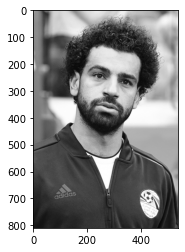

In [5]:
# Use the gray colour map
plt.imshow(gray_image, cmap="gray")

To get the face of the individual in the image, I'll be using the opencv haarcascade pre-trained models.<br>
##### How it works?
The haarcascade pre-trained model takes the image and ascertains where the portion of interest, lies on the x and y axis. It does this using edge and line feature detection. If you wish to read more about opencv haarcasacde, the full documentation is [here](https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html)

In [6]:
# Load the haarcascade models into variables
detect_face = cv2.CascadeClassifier(r"C:\Users\ifunanyaScript\Everything\FootballStars_image_cnn\opencv\haarcascade_frontalface_default.xml")
detect_eye = cv2.CascadeClassifier(r"C:\Users\ifunanyaScript\Everything\FootballStars_image_cnn\opencv\haarcascade_eye.xml")

# Get the where the face lies on the x and y axis
face = detect_face.detectMultiScale(gray_image, 1.3, 5)
face

array([[146, 139, 289, 289]])

In [7]:
# Assign the values in the face array to variables, to make things easier.
(x, y, w, h) = face[0]

Now we can use the above variables to draw an outline of the face, which is the portion of the image that we are interested in.

**NB:** If there are two faces in the image, the haarcascade model will return two arrays for each respective face. And if there are more than two faces it will do the same for them.

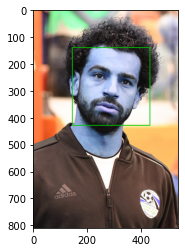

In [8]:
# Draw a rectangle that outlines the face using (x, y, w, h)
face_outline = cv2.rectangle(image, (x, y), (x+w, y+h), (0, 200, 0), 2)
plt.imshow(face_outline)

In [9]:
cv2.destroyAllWindows()

After getting the face, another important is to get the two eyes. Predicting a person with their faces is going to be dependent on these things obviously. 

To get the eyes, we write a loop that goes over the face and draws an outline of the two eyes.

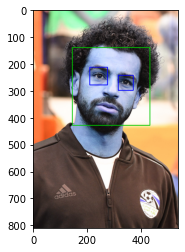

In [10]:
for (x, y, w, h) in face:
    # Get the gray and coloured face crop.
    region_gray = gray_image[y:y+h, x:x+w]
    region_colour = face_outline[y:y+h, x:x+w]
    
    # Get where both eyes lie on the x and y axis.
    eyes = detect_eye.detectMultiScale(region_gray)
    
    # For each eye, draw a rectangle that outline the eye.
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(region_colour, (ex, ey), (ex+ew, ey+eh), (0, 0, 255), 2)
        
# We can now visualise the outlined image
plt.imshow(face_outline)
plt.show()

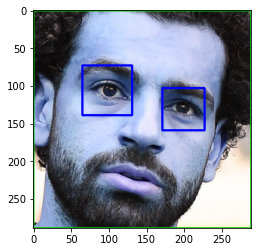

In [11]:
# Visualise the cropped image with eyes outlined.
plt.imshow(region_colour)

The goal of data cleaning is to get valid images that we can train our model with.  
I'll write a function that will take an image, get the face and check if two eyes are clearly visible. If the two eyes are visible, the function will return a cropped image of the face.

In [12]:
# This is like wrapping all I've done in the previous cell block into a function.
def get_clean_image(path):
    image= cv2.imread(path)
    if image is not None:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        face = detect_face.detectMultiScale(gray_image, 1.3, 5)
        for (x, y, w, h) in face:
            region_gray = gray_image[y:y+h, x:x+w]
            region_colour = image[y:y+h, x:x+w]
            eyes = detect_eye.detectMultiScale(region_gray)
            # Check if there are two eyes
            if len(eyes) >= 2:
                # return the cropped image of the face.
                return region_colour

Let's see if the function works.

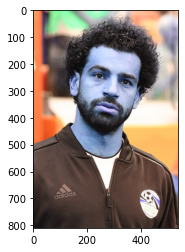

In [13]:
# Visualise the raw unclean image.
initial_image = cv2.imread(r"C:\Users\ifunanyaScript\Everything\FootballStars_image_cnn\data\misc_data\mo1.jpg")
plt.imshow(initial_image)

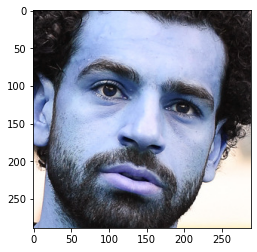

In [14]:
# Use the function to visualise the clean image.
clean_image = get_clean_image(r"C:\Users\ifunanyaScript\Everything\FootballStars_image_cnn\data\misc_data\mo1.jpg")
plt.imshow(clean_image)

Now, what will the function return if the said face in the image doesn't have two eyes.  
Let's see!

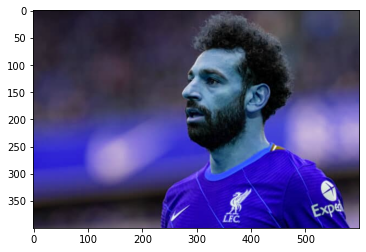

In [15]:
# Visulaise the raw unclean image
initial_image2 = cv2.imread(r"C:\Users\ifunanyaScript\Everything\FootballStars_image_cnn\data\misc_data\mo2.jpg")
plt.imshow(initial_image2)

In [16]:
clean_image2 = get_clean_image(r"C:\Users\ifunanyaScript\Everything\FootballStars_image_cnn\data\test_data\mo2.jpg")
clean_image2

The function returns nothing because it can't find two eyes on the face.  
We want it to be this way, because to train our model efficiently, we specifically need a face with two eyes.

Now, that the function is ready and fully functional, I can now implement it on the entire dataset.  
On my machine, I have a dataset directory that has images of six popular footballers. Obviously, there will be images that need to be cleaned.  
Let's get to it.

In [24]:
# Assign the path to the entire dataset and the path to the prospective clean image folder to variables.
dataset_path = r"C:/Users/ifunanyaScript/Everything/FootballStars_image_cnn/data/dataset/"
clean_dataset_path = r"C:/Users/ifunanyaScript/Everything/FootballStars_image_cnn/data/clean_dataset/"

In the dataset directory, there are also sub directories for each footballer which contains the images of said footballer.  
We need the path to these different sub directories.

In [27]:
import os
# Initialise a list that will hold the sub directories path
sub_dirs = []
for entry in os.scandir(dataset_path):
    if entry.is_dir():
        sub_dirs.append(entry.path)

In [28]:
sub_dirs

['C:/Users/ifunanyaScript/Everything/FootballStars_image_cnn/data/dataset/cristiano_ronaldo',
 'C:/Users/ifunanyaScript/Everything/FootballStars_image_cnn/data/dataset/karim_benzema',
 'C:/Users/ifunanyaScript/Everything/FootballStars_image_cnn/data/dataset/leo_messi',
 'C:/Users/ifunanyaScript/Everything/FootballStars_image_cnn/data/dataset/mohamed_salah',
 'C:/Users/ifunanyaScript/Everything/FootballStars_image_cnn/data/dataset/robert_lewandoski',
 'C:/Users/ifunanyaScript/Everything/FootballStars_image_cnn/data/dataset/zlatan_ibrahimovic']

Now, we create the folder that will holds the clean images

In [29]:
import shutil

# If the folder already, delete it.
if os.path.exists(clean_dataset_path):
    shutil.rmtree(clean_dataset_path)

# Create the new folder
os.makedirs(clean_dataset_path)

Now that we have a list of the sub directories and we have created the new folder for the clean images, we can go ahead and clean the entire dataset.

In [30]:
clean_image_dirs = []
footballer_filenames_dict = {}

# We iterate through each directory in sub_dirs, and get the clean image from the original image.
# Then we add the clean image as a file.
for sub_dir in sub_dirs:
    file_count = 1
    footballer_name = sub_dir.split("/")[-1]  # Get the footballer's name
    print(footballer_name)
    
    footballer_filenames_dict[footballer_name] = []
    
    for entry in os.scandir(sub_dir):
        region_colour = get_clean_image(entry.path) # Get the clean image.
        if region_colour is not None:  # Effectively ignore images that return nothing.
            clean_image_dir = clean_dataset_path + footballer_name  # New directory to hold clean images for each footballer 
            if not os.path.exists(clean_image_dir):
                os.makedirs(clean_image_dir)
                clean_image_dirs.append(clean_image_dir)
                print(f"Processing clean images in: {clean_image_dir} \n")
            clean_image_filename = footballer_name + str(file_count) + ".png"
            clean_image_path = clean_image_dir + "/" + clean_image_filename
            
            cv2.imwrite(clean_image_path, region_colour)  # Write the clean image to the path on the machine
            footballer_filenames_dict[footballer_name].append(clean_image_path)
            file_count += 1

cristiano_ronaldo
Processing clean images in: C:/Users/ifunanyaScript/Everything/FootballStars_image_cnn/data/clean_dataset/cristiano_ronaldo 

karim_benzema
Processing clean images in: C:/Users/ifunanyaScript/Everything/FootballStars_image_cnn/data/clean_dataset/karim_benzema 

leo_messi
Processing clean images in: C:/Users/ifunanyaScript/Everything/FootballStars_image_cnn/data/clean_dataset/leo_messi 

mohamed_salah
Processing clean images in: C:/Users/ifunanyaScript/Everything/FootballStars_image_cnn/data/clean_dataset/mohamed_salah 

robert_lewandoski
Processing clean images in: C:/Users/ifunanyaScript/Everything/FootballStars_image_cnn/data/clean_dataset/robert_lewandoski 

zlatan_ibrahimovic
Processing clean images in: C:/Users/ifunanyaScript/Everything/FootballStars_image_cnn/data/clean_dataset/zlatan_ibrahimovic 



**NB:** The above process cropped the important portion *(face with two eyes)* of every image in the dataset and saved them in their respective folders. However, this automated process might not be 100% efficient, because of some instances where there are more than one person in the image, and the function returns the face of someone we are not interested in.  
Hence, there is a need to manually go over these cropped images to check if they are all valid, and delete the invalid ones. 

Now that we have clean images, we can proceed to the next phase: **Feature Engineering**. 

There's a variable that's essential for the next step, so I'll save it with jupyter magic command

In [ ]:
%store footballer_filenames_dict  # Store the variable footballer_filenames_dict

In [31]:
# ifunanyaScript